# ЭТО СИНТЕТИКА

In [2]:
import os
import csv
import wfdb
import heartpy as hp
import pandas as pd
import numpy as np
import scipy.signal as ssignal

In [4]:
def cheby(ppg, fs, order=4, rs=20, btype='low'):
    nyquist = 0.5 * fs
    cutoff = 10 / nyquist
    rs, order = 20, 4
    b, a = ssignal.cheby2(N=order, rs=rs, Wn=cutoff, btype='low')
    return ssignal.filtfilt(b, a, ppg)

In [6]:
record = wfdb.rdrecord(r"D:\Proga\AML\datasets\PWDB\PWs_wfdb\wfdb\pwdb0003")
#print(record.__dict__)
cindex = record.sig_name.index('Radial_PPG,')
signal = record.p_signal[:cindex] + record.p_signal[:cindex] + record.p_signal[:cindex]

print(len(signal.flatten()))
print(record.fs)

signal = cheby(signal.flatten(),fs=record.fs, order=4)

wd,m = hp.process(signal,sample_rate=record.fs)
print(m)

988
500
{'bpm': nan, 'ibi': nan, 'sdnn': nan, 'sdsd': masked, 'rmssd': nan, 'pnn20': nan, 'pnn50': nan, 'hr_mad': nan, 'sd1': nan, 'sd2': nan, 's': nan, 'sd1/sd2': nan, 'breathingrate': nan}


c:\Users\toha2\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\toha2\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\toha2\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\ma\core.py:5317: RuntimeWarning: Mean of empty slice.
  result = super().mean(axis=axis, dtype=dtype, **kwargs)[()]
c:\Users\toha2\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\fromnumeric.py:3747: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


Длина сигнала: 386
Частота дискретизации: 500 Гц


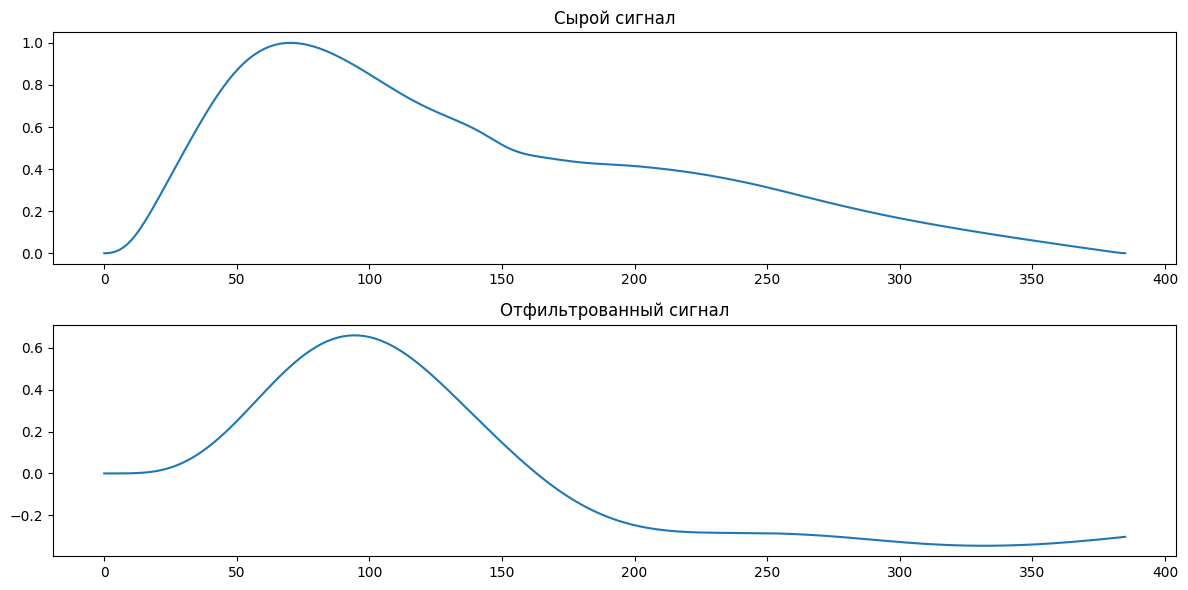

{'bpm': nan, 'ibi': nan, 'sdnn': nan, 'sdsd': masked, 'rmssd': nan, 'pnn20': nan, 'pnn50': nan, 'hr_mad': nan, 'sd1': nan, 'sd2': nan, 's': nan, 'sd1/sd2': nan, 'breathingrate': nan}


c:\Users\toha2\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\toha2\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\toha2\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\ma\core.py:5317: RuntimeWarning: Mean of empty slice.
  result = super().mean(axis=axis, dtype=dtype, **kwargs)[()]
c:\Users\toha2\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\fromnumeric.py:3747: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


In [10]:
import wfdb
import heartpy as hp
import matplotlib.pyplot as plt

# Чтение записи
record = wfdb.rdrecord(r"D:\Proga\AML\datasets\PWDB\PWs_wfdb\wfdb\pwdb0003")

# Нахождение индекса сигнала Radial_PPG
cindex = record.sig_name.index('Radial_PPG,')
signal = record.p_signal[:, cindex].flatten()

# Вывод информации о сигнале
print(f"Длина сигнала: {len(signal)}")
print(f"Частота дискретизации: {record.fs} Гц")

# Фильтрация сигнала
def funcBPFilter(signal, order=2, f1=0.5, f2=4.0, fs=record.fs):
    from scipy.signal import butter, lfilter
    nyq = 0.5 * fs
    low = f1 / nyq
    high = f2 / nyq
    b, a = butter(order, [low, high], btype='band')
    y = lfilter(b, a, signal)
    return y

signal_filtered = funcBPFilter(signal, order=2, f1=0.5, f2=4.0, fs=record.fs)

# Визуализация сигнала до и после фильтрации
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(signal)
plt.title('Сырой сигнал')
plt.subplot(2, 1, 2)
plt.plot(signal_filtered)
plt.title('Отфильтрованный сигнал')
plt.tight_layout()
plt.show()

# Обработка сигнала с помощью heartpy
try:
    wd, m = hp.process(signal_filtered, sample_rate=record.fs)
    print(m)
except hp.exceptions.BadSignalWarning as e:
    print(e)